In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
import cv2
import os
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras import *
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [3]:
dataset_dir=od.download(
    "https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rafiasohail39
 ··········
Your Kaggle Key:Downloading mango-leaf-disease-dataset.zip to ./mango-leaf-disease-dataset


100%|██████████| 103M/103M [00:00<00:00, 210MB/s] 


In [4]:
list_dir = ['Anthracnose',  'Bacterial Canker',  'Cutting Weevil',  'Die Back'  ,'Gall Midge', 'Healthy','Powdery Mildew','Sooty Mould']
import glob
Anthracnose = glob.glob('mango-leaf-disease-dataset/Anthracnose/*.*')
BacterialCanker = glob.glob('mango-leaf-disease-dataset/Bacterial Canker/*.*')
CuttingWeevi = glob.glob('mango-leaf-disease-dataset/Cutting Weevi/*.*')
DieBack = glob.glob('mango-leaf-disease-dataset/Die Back/*.*')
GallMidge = glob.glob('mango-leaf-disease-dataset/Gall Midge/*.*')
Healthy = glob.glob('mango-leaf-disease-dataset/Healthy/*.*')
PowderyMildew = glob.glob('mango-leaf-disease-dataset/Powdery Mildew/*.*')
SootyMouldkey = glob.glob('mango-leaf-disease-dataset/Sooty Mould/*.*')


data = []
labels = []

for i in Anthracnose:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in BacterialCanker:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in CuttingWeevi:   
    image=tf.keras.preprocessing.image.load_img(i,
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in DieBack:   
    image=tf.keras.preprocessing.image.load_img(i,
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in GallMidge:   
    image=tf.keras.preprocessing.image.load_img(i, 
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in Healthy:   
    image=tf.keras.preprocessing.image.load_img(i,
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(7)
for i in PowderyMildew:   
    image=tf.keras.preprocessing.image.load_img(i,
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(8)
for i in SootyMouldkey:   
    image=tf.keras.preprocessing.image.load_img(i,
    target_size= (220,220))
    image=np.array(image)
    data.append(image)
    labels.append(9)




data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [6]:
data = np.array(data)
labels = np.array(labels)
val_data = np.array(X_test)
val_labels = np.array(ytest)

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(labels)
labels = label_encoder.transform(labels)
label_encoder = preprocessing.LabelEncoder().fit(val_labels)
val_labels = label_encoder.transform(val_labels)

In [8]:
image_shape = (220,220,3)

model = Sequential()

model.add(Conv2D(16, 3, activation='relu', padding='same', input_shape=image_shape))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [9]:
print(data.shape)
print(labels.shape)

print(val_data.shape)
print(val_labels.shape)

(3500, 220, 220, 3)
(3500,)
(700, 220, 220, 3)
(700,)


In [10]:
from tensorflow.keras.optimizers import Adam 

model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])
history = model.fit(data,
                    labels ,
                    validation_data=(val_data,val_labels),
                    epochs=10,
                    batch_size=32)
                    
                    

Epoch 1/10
110/110 [==============================] - 19s 41ms/step - loss: 2.7336 - accuracy: 0.5874 - val_loss: 0.3807 - val_accuracy: 0.8471
Epoch 2/10
110/110 [==============================] - 3s 30ms/step - loss: 0.4486 - accuracy: 0.8517 - val_loss: 0.3496 - val_accuracy: 0.8600
Epoch 3/10
110/110 [==============================] - 3s 30ms/step - loss: 0.2191 - accuracy: 0.9206 - val_loss: 0.0692 - val_accuracy: 0.9771
Epoch 4/10
110/110 [==============================] - 3s 30ms/step - loss: 0.1321 - accuracy: 0.9569 - val_loss: 0.0734 - val_accuracy: 0.9771
Epoch 5/10
110/110 [==============================] - 3s 30ms/step - loss: 0.1083 - accuracy: 0.9637 - val_loss: 0.0835 - val_accuracy: 0.9700
Epoch 6/10
110/110 [==============================] - 3s 29ms/step - loss: 0.1041 - accuracy: 0.9683 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 7/10
110/110 [==============================] - 3s 31ms/step - loss: 0.0963 - accuracy: 0.9683 - val_loss: 0.0880 - val_accuracy: 0.962

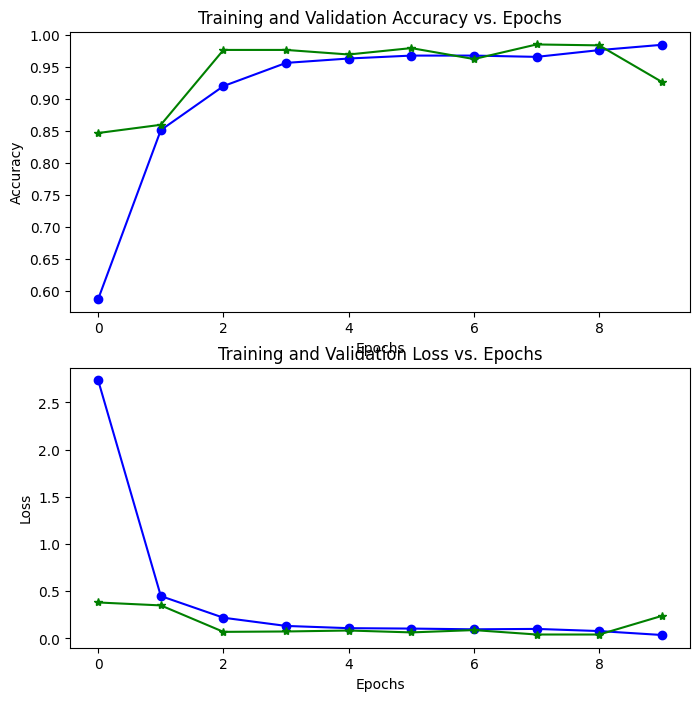

In [11]:
import matplotlib.pyplot as plt

figure, graph = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

graph[0].set_title('Training and Validation Accuracy vs. Epochs')
graph[0].plot(history.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
graph[0].plot(history.history['val_accuracy'], '*-', color='green', label='Validation Accuracy')
graph[0].set_xlabel('Epochs')
graph[0].set_ylabel('Accuracy')

graph[1].set_title('Training and Validation Loss vs. Epochs')
graph[1].plot(history.history['loss'], 'o-', color='blue', label='Training Loss')
graph[1].plot(history.history['val_loss'], '*-', color='green', label='Validation Loss')
graph[1].set_xlabel('Epochs')
graph[1].set_ylabel('Loss')

plt.show()



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

In [13]:
np.unique(ytrain)
nsamples,nx,ny,nz = X_train.shape
X_train_reshaped=X_train.reshape((nsamples,nx*ny*nz))
nsamples,nx,ny,nz=X_test.shape
X_test_reshaped=X_test.reshape((nsamples,nx*ny*nz))

In [ ]:
rmc_model=RandomForestClassifier()
rmc_model.fit(X_train_reshaped,ytrain)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=rmc_model.predict(X_test_reshaped)
y_pred
accuracy_score(y_pred,ytest)
print(classification_report(y_pred,ytest))
confusion_matrix(y_pred,ytest)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       127
           1       0.90      0.88      0.89       107
           3       0.94      0.98      0.96        91
           4       0.79      0.79      0.79       101
           7       0.89      0.88      0.88        88
           8       0.87      0.90      0.88        86
           9       0.79      0.77      0.78       100

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700



array([[118,   1,   3,   4,   0,   0,   1],
       [  2,  94,   3,   6,   0,   1,   1],
       [  0,   2,  89,   0,   0,   0,   0],
       [  2,   3,   0,  80,   5,   2,   9],
       [  1,   0,   0,   6,  77,   1,   3],
       [  0,   0,   0,   1,   2,  77,   6],
       [  3,   5,   0,   4,   3,   8,  77]])

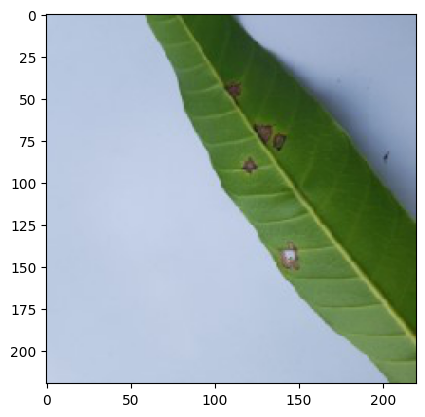


Anthracnose


In [ ]:
import matplotlib.pyplot as plt
img=X_test[20]
plt.imshow(img)
plt.show()
print()
rmc_pred=rmc_model.predict(X_test[20].reshape(1,220*220*3))
for i in range(8):
  if rmc_pred==i:
    print(list_dir[i])

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_reshaped,ytrain)
y_pred=dt_model.predict(X_test_reshaped)
y_pred
accuracy_score(y_pred,ytest)
print(classification_report(y_pred,ytest))
confusion_matrix(y_pred,ytest)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       119
           1       0.71      0.69      0.70       109
           3       0.87      0.79      0.83       105
           4       0.50      0.51      0.51       100
           7       0.62      0.65      0.64        83
           8       0.74      0.69      0.71        96
           9       0.55      0.60      0.57        88

    accuracy                           0.67       700
   macro avg       0.67      0.66      0.67       700
weighted avg       0.67      0.67      0.67       700



array([[86,  8,  6,  8,  7,  1,  3],
       [ 9, 75,  4, 12,  4,  1,  4],
       [12,  7, 83,  2,  0,  1,  0],
       [ 5,  9,  1, 51,  6,  7, 21],
       [ 5,  2,  0, 11, 54,  5,  6],
       [ 4,  1,  0,  8,  7, 66, 10],
       [ 5,  3,  1,  9,  9,  8, 53]])

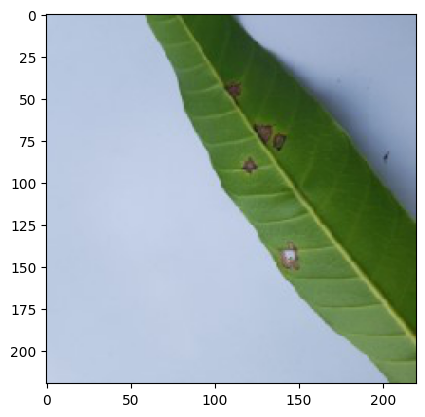


Anthracnose


In [ ]:
import matplotlib.pyplot as plt
img=X_test[20]
plt.imshow(img)
plt.show()
print()
dt_pred=dt_model.predict(X_test[20].reshape(1,220*220*3))
for i in range(8):
  if dt_pred==i:
    print(list_dir[i])

In [ ]:
nb_model=DecisionTreeClassifier()
nb_model.fit(X_train_reshaped,ytrain)
y_pred=nb_model.predict(X_test_reshaped)
y_pred
accuracy_score(y_pred,ytest)
print(classification_report(y_pred,ytest))
confusion_matrix(y_pred,ytest)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       122
           1       0.71      0.72      0.72       104
           3       0.88      0.79      0.84       106
           4       0.51      0.53      0.52        99
           7       0.64      0.61      0.63        92
           8       0.65      0.62      0.64        93
           9       0.51      0.58      0.54        84

    accuracy                           0.66       700
   macro avg       0.66      0.65      0.66       700
weighted avg       0.67      0.66      0.66       700



array([[89,  8,  6,  5,  7,  2,  5],
       [ 6, 75,  3, 10,  3,  2,  5],
       [ 9,  7, 84,  2,  1,  2,  1],
       [ 5,  9,  2, 52,  9,  8, 14],
       [ 8,  2,  0, 12, 56,  7,  7],
       [ 4,  2,  0,  7,  6, 58, 16],
       [ 5,  2,  0, 13,  5, 10, 49]])

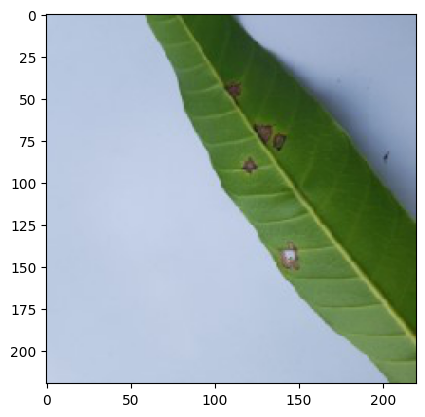


Anthracnose


In [ ]:
import matplotlib.pyplot as plt
img=X_test[20]
plt.imshow(img)
plt.show()
print()
nb_pred=nb_model.predict(X_test[20].reshape(1,220*220*3))
for i in range(8):
  if nb_pred==i:
    print(list_dir[i])

In [ ]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_reshaped,ytrain)
y_pred=knn_model.predict(X_test_reshaped)
y_pred
accuracy_score(y_pred,ytest)
print(classification_report(y_pred,ytest))
confusion_matrix(y_pred,ytest)

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       118
           1       0.94      0.67      0.79       147
           3       0.88      0.86      0.87        98
           4       0.62      0.58      0.60       109
           7       0.52      0.59      0.55        76
           8       0.52      0.70      0.59        66
           9       0.60      0.67      0.63        86

    accuracy                           0.68       700
   macro avg       0.67      0.68      0.67       700
weighted avg       0.70      0.68      0.68       700



array([[78,  5,  0, 18,  6,  3,  8],
       [16, 99, 11,  6,  2,  2, 11],
       [11,  0, 84,  1,  1,  1,  0],
       [12,  0,  0, 63, 21,  9,  4],
       [ 6,  0,  0,  3, 45, 13,  9],
       [ 2,  0,  0,  5,  6, 46,  7],
       [ 1,  1,  0,  5,  6, 15, 58]])

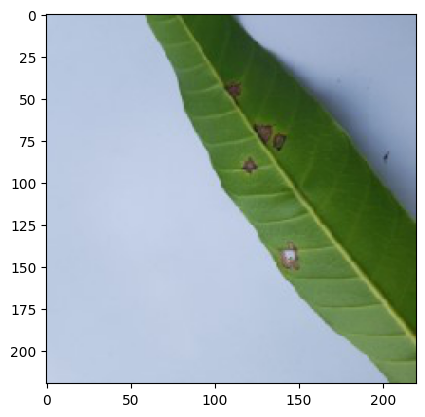


Anthracnose


In [ ]:
import matplotlib.pyplot as plt
img=X_test[20]
plt.imshow(img)
plt.show()
print()
knn_pred=knn_model.predict(X_test[20].reshape(1,220*220*3))
for i in range(8):
  if knn_pred==i:
    print(list_dir[i])

In [ ]:
svm_model=SVC()
svm_model.fit(X_train_reshaped,ytrain)
y_pred=knn_model.predict(X_test_reshaped)
y_pred
accuracy_score(y_pred,ytest)
print(classification_report(y_pred,ytest))
confusion_matrix(y_pred,ytest)

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       118
           1       0.94      0.67      0.79       147
           3       0.88      0.86      0.87        98
           4       0.62      0.58      0.60       109
           7       0.52      0.59      0.55        76
           8       0.52      0.70      0.59        66
           9       0.60      0.67      0.63        86

    accuracy                           0.68       700
   macro avg       0.67      0.68      0.67       700
weighted avg       0.70      0.68      0.68       700



array([[78,  5,  0, 18,  6,  3,  8],
       [16, 99, 11,  6,  2,  2, 11],
       [11,  0, 84,  1,  1,  1,  0],
       [12,  0,  0, 63, 21,  9,  4],
       [ 6,  0,  0,  3, 45, 13,  9],
       [ 2,  0,  0,  5,  6, 46,  7],
       [ 1,  1,  0,  5,  6, 15, 58]])

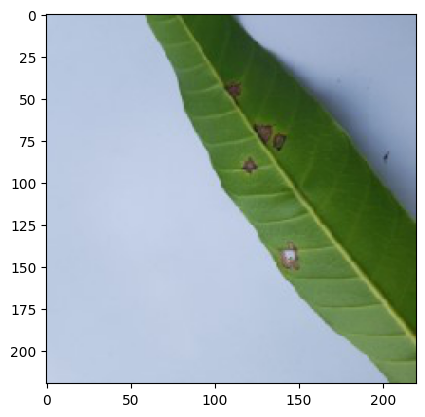


Anthracnose


In [ ]:
import matplotlib.pyplot as plt
img=X_test[20]
plt.imshow(img)
plt.show()
print()
svm_pred=knn_model.predict(X_test[20].reshape(1,220*220*3))
for i in range(8):
  if svm_pred==i:
    print(list_dir[i])

In [14]:
from sklearn import model_selection
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10, random_state=50, shuffle=True)
         cv_results = model_selection.cross_val_score(model, X_train_reshaped, ytrain, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

RFC: 0.870357 (0.010956)
DT: 0.662500 (0.023379)
KNN: 0.673571 (0.022200)
NB: 0.569643 (0.024130)
SVM: 0.817857 (0.021783)


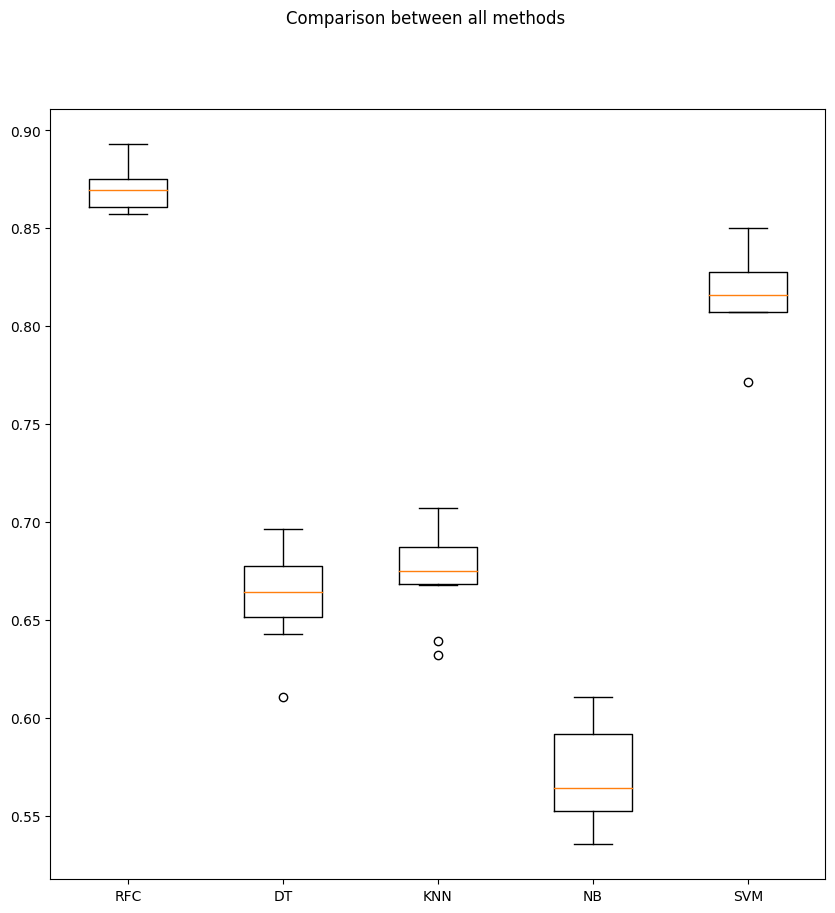

In [15]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison between all methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

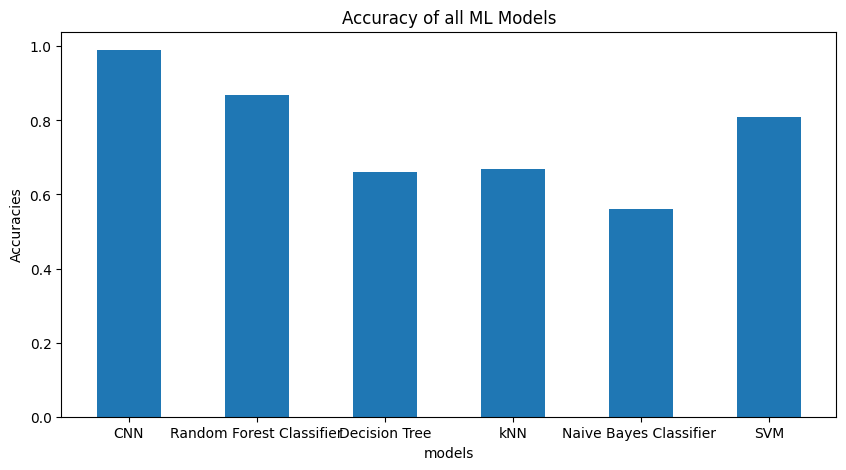

In [20]:


models = ['CNN', 'Random Forest Classifier','Decision Tree','kNN', 'Naive Bayes Classifier ', 'SVM']
acc = [0.99, 0.87, 0.66, 0.67, 0.56, 0.81] 
x_axis = np.arange(len(models))
fig = plt.figure(figsize = (10, 5))
#colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0, 0, 1), (1, 0, 0), (1, 1, 0)]
# creating the bar plot
plt.bar(x_axis, acc, width = 0.5)
plt.xticks(x_axis, models)
plt.xlabel("models")
plt.ylabel("Accuracies")
plt.title("Accuracy of all ML Models")
plt.show()